# Session 8: From Rows, to Lists, Arrays, and DataFrames

## Iterating Over Rows

So far we have learned how to iterate through the rows of a file in order to process each row, one at a time.  It has its limitations.  In this session we compare working with iteration over rows, to two alternatives: generating lists from the rows, and generating arrays using Numpy.  We close with an introduction to the pandas package, which we will begin using extensively.

But first, let's load a simple cvs file with one column, containing 50 random numbers between 0 and 1:

In [1]:
import csv
with open('Data/random.csv', 'rb') as csvfile:
    i = 0
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        print row

['4.093732012568683798e-01']
['2.605739881846624861e-01']
['3.292968362616999212e-01']
['1.536925158765528598e-01']
['2.332904307861635163e-01']
['5.837548365200595502e-02']
['5.332588448002980597e-01']
['6.687962527527715473e-01']
['5.332264351934751234e-01']
['8.415076456699467355e-01']
['7.979353969441536076e-01']
['4.323377179407571491e-01']
['3.475460528990772513e-01']
['7.466619516233284903e-01']
['1.581300577586214340e-01']
['9.466802390670823186e-01']
['5.818232321654557282e-01']
['7.928258464748998424e-01']
['4.199821139433508321e-01']
['7.683834129272146818e-01']
['1.081849759159183577e-01']
['2.572187926784939016e-01']
['2.522365149232430603e-02']
['8.997766344084331402e-01']
['9.202595213921237471e-01']
['2.061939588802470524e-01']
['4.238928642445808359e-01']
['2.584410137397719076e-02']
['2.853395943759442499e-01']
['3.408062007554369943e-01']
['2.572246414066634568e-01']
['3.607105175611515779e-01']
['5.595361970394099327e-01']
['1.302252140994600849e-01']
['8.3653384246

The first task is to calculate a mean value of these numbers.  How can we do that?

In [2]:
import csv
with open('Data/random.csv', 'r') as csvfile:
    i = 0
    cumsum = 0
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        i = i+1
        cumsum = cumsum+float(row[0])
    mean = cumsum/i
    print mean

0.524439806764


How about computing the min and max values?

In [3]:
import csv
with open('Data/random.csv', 'r') as csvfile:
    i = 0
    cumsum = 0
    min = 1
    max = 0
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        i = i+1
        cumsum = cumsum+float(row[0])
        if float(row[0])>max:
            max = float(row[0])
        if float(row[0])<min:
            min = float(row[0])
    mean = cumsum/i
    print mean, min, max

0.524439806764 0.0252236514923 0.946680239067


Now let's say we need to compute the median of these numbers.  Remember that a median is the value for which half of the observations are less and half are greater.  Any suggestions on how to code this using our iteration approach, and without resorting to creating a list?

## Using Lists to Analyze Data

Some things that are hard in the row iteration approach above, become easier if we can keep all of the values in one object, like a list.

Let's revisit the problems above, by assembling the values from each row into a single list.

In [4]:
import csv
with open('Data/random.csv', 'r') as csvfile:
    x = []
    itemreader = csv.reader(csvfile)
    for row in itemreader:
        x.append(float(row[0]))
x

[0.4093732012568684,
 0.2605739881846625,
 0.3292968362616999,
 0.15369251587655286,
 0.23329043078616352,
 0.058375483652005955,
 0.5332588448002981,
 0.6687962527527715,
 0.5332264351934751,
 0.8415076456699467,
 0.7979353969441536,
 0.43233771794075715,
 0.34754605289907725,
 0.7466619516233285,
 0.15813005775862143,
 0.9466802390670823,
 0.5818232321654557,
 0.7928258464748998,
 0.41998211394335083,
 0.7683834129272147,
 0.10818497591591836,
 0.2572187926784939,
 0.025223651492324306,
 0.8997766344084331,
 0.9202595213921237,
 0.20619395888024705,
 0.42389286424458084,
 0.02584410137397719,
 0.28533959437594425,
 0.340806200755437,
 0.25722464140666346,
 0.3607105175611516,
 0.5595361970394099,
 0.13022521409946008,
 0.8365338424691172,
 0.7674578942113987,
 0.9166277316995728,
 0.10282324854265201,
 0.8514145952338723,
 0.9289184807191826,
 0.4110611617848009,
 0.0866924684400674,
 0.8206823663887279,
 0.9081734329877278,
 0.7107543205262647,
 0.8664969060282058,
 0.78953865451136

X is now a single list object with all the values in the file, whereas initially we just had each row producing one list with one element in it (from one row), and then printing that, before recreating it with the value from the next row.  The iteration approach kept only one row at a time, and we could not easily do calculations like a median.

Using the list (x), we should now have an easier time with mean and median calculations, using list methods like sum and len, and sort:

In [5]:
mean = sum(x)/len(x)
print mean

0.524439806764


We can solve the median problem by sorting the list, and getting the value that is halfway through the list:

In [6]:
x.sort()
median = x[len(x)/2]
print median

0.5332588448


It is also simple to get the min and max, using built-in list methods:

In [7]:
min = x[0]
min

0.025223651492324306

In [8]:
max = x[-1]
max

0.9466802390670823

OK, this is progress.  Can we now do other math on the data, like multiply each value by 5?

In [9]:
y = x*5
y

[0.025223651492324306,
 0.02584410137397719,
 0.058375483652005955,
 0.0866924684400674,
 0.10282324854265201,
 0.10818497591591836,
 0.13022521409946008,
 0.15369251587655286,
 0.15813005775862143,
 0.20619395888024705,
 0.23329043078616352,
 0.2572187926784939,
 0.25722464140666346,
 0.2605739881846625,
 0.28533959437594425,
 0.3292968362616999,
 0.340806200755437,
 0.34754605289907725,
 0.3607105175611516,
 0.4093732012568684,
 0.4110611617848009,
 0.41998211394335083,
 0.42389286424458084,
 0.43233771794075715,
 0.5332264351934751,
 0.5332588448002981,
 0.5595361970394099,
 0.5818232321654557,
 0.6653522724979578,
 0.6687962527527715,
 0.7107543205262647,
 0.7466619516233285,
 0.7674578942113987,
 0.7683834129272147,
 0.7895386545113654,
 0.7928258464748998,
 0.7979353969441536,
 0.8206823663887279,
 0.8365338424691172,
 0.8415076456699467,
 0.8514145952338723,
 0.8664969060282058,
 0.8699019981469763,
 0.8754264422252427,
 0.8997766344084331,
 0.9081734329877278,
 0.91662773169957

Not what we wanted. That just concatenated 5 copies of the list together!

Let's take a different approach.

In [10]:
y = []
for item in range(len(x)):
    y.append(x[item]*5)
y

[0.12611825746162153,
 0.12922050686988595,
 0.2918774182600298,
 0.43346234220033697,
 0.5141162427132601,
 0.5409248795795918,
 0.6511260704973004,
 0.7684625793827643,
 0.7906502887931072,
 1.0309697944012353,
 1.1664521539308175,
 1.2860939633924695,
 1.2861232070333173,
 1.3028699409233124,
 1.4266979718797212,
 1.6464841813084996,
 1.7040310037771849,
 1.7377302644953863,
 1.803552587805758,
 2.046866006284342,
 2.0553058089240044,
 2.099910569716754,
 2.119464321222904,
 2.1616885897037856,
 2.6661321759673755,
 2.6662942240014904,
 2.79768098519705,
 2.9091161608272786,
 3.326761362489789,
 3.3439812637638577,
 3.5537716026313237,
 3.7333097581166426,
 3.837289471056993,
 3.8419170646360734,
 3.947693272556827,
 3.964129232374499,
 3.9896769847207683,
 4.10341183194364,
 4.182669212345586,
 4.207538228349733,
 4.257072976169361,
 4.332484530141029,
 4.349509990734882,
 4.377132211126213,
 4.498883172042166,
 4.540867164938639,
 4.583138658497864,
 4.601297606960618,
 4.64459240

Alright, this is a big improvement over the iteration over rows approach, but it is still a bit tedious.

Now let's look at the use of arrays, the basic data structure added by Numpy, which gets loaded when you use %pylab inline:

In [2]:
#%pylab inline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

a = np.genfromtxt('Data/random.csv')
a

array([ 0.4093732 ,  0.26057399,  0.32929684,  0.15369252,  0.23329043,
        0.05837548,  0.53325884,  0.66879625,  0.53322644,  0.84150765,
        0.7979354 ,  0.43233772,  0.34754605,  0.74666195,  0.15813006,
        0.94668024,  0.58182323,  0.79282585,  0.41998211,  0.76838341,
        0.10818498,  0.25721879,  0.02522365,  0.89977663,  0.92025952,
        0.20619396,  0.42389286,  0.0258441 ,  0.28533959,  0.3408062 ,
        0.25722464,  0.36071052,  0.5595362 ,  0.13022521,  0.83653384,
        0.76745789,  0.91662773,  0.10282325,  0.8514146 ,  0.92891848,
        0.41106116,  0.08669247,  0.82068237,  0.90817343,  0.71075432,
        0.86649691,  0.78953865,  0.66535227,  0.87542644,  0.869902  ])

In [3]:
np.size(a)

50

In [4]:
np.size(a)

50

In [5]:
np.shape(a)

(50,)

In [ ]:
np.mean(a)

In [6]:
np.median(a)

0.53324263999688659

In [7]:
np.min(a)

0.025223651492324306

In [8]:
np.max(a)

0.94668023906708232

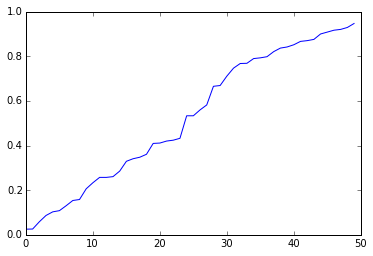

In [9]:
plt.plot(np.sort(a))

In [37]:
b = a*5
b

array([ 2.04686601,  1.30286994,  1.64648418,  0.76846258,  1.16645215,
        0.29187742,  2.66629422,  3.34398126,  2.66613218,  4.20753823,
        3.98967698,  2.16168859,  1.73773026,  3.73330976,  0.79065029,
        4.7334012 ,  2.90911616,  3.96412923,  2.09991057,  3.84191706,
        0.54092488,  1.28609396,  0.12611826,  4.49888317,  4.60129761,
        1.03096979,  2.11946432,  0.12922051,  1.42669797,  1.704031  ,
        1.28612321,  1.80355259,  2.79768099,  0.65112607,  4.18266921,
        3.83728947,  4.58313866,  0.51411624,  4.25707298,  4.6445924 ,
        2.05530581,  0.43346234,  4.10341183,  4.54086716,  3.5537716 ,
        4.33248453,  3.94769327,  3.32676136,  4.37713221,  4.34950999])

# Introducing Pandas

We have moved from processing file with iterators over rows, to lists with iterators, to using Numpy arrays to do vectorized operations that are much faster and are also less complex to read, understand and to code. We moved from operating on one item in a list at a time, to operating on a whole array at one time. Now we want to be able to move to handling the whole table of data at once.

One of the problems we did not attempt to deal with using arrays, or lists, was how to keep rows of data together so that if we skip a missing value in one variable like price, it does not cause the other variables to be mis-aligned due to changes in the length of the array or list for one entry. This is one of many things that the pandas library does for us.
We skip forward a bit to Chapter 6 in Python for Data Analysis in order to learn how to load our data using pandas. Here is how:

In [38]:
import pandas as pd
df = pd.read_csv('Data/ca_tracts_pop_cleaned.csv')
df[:5]

,POPGROUP,label,GEOIDLONG,GEOID,geodisplay,Population
0,1,Total population,1400000US06001400100,6001400100,"Census Tract 4001, Alameda County, California",2937
1,1,Total population,1400000US06001400200,6001400200,"Census Tract 4002, Alameda County, California",1974
2,1,Total population,1400000US06001400300,6001400300,"Census Tract 4003, Alameda County, California",4865
3,1,Total population,1400000US06001400400,6001400400,"Census Tract 4004, Alameda County, California",3703
4,1,Total population,1400000US06001400500,6001400500,"Census Tract 4005, Alameda County, California",3517


We just read the csv file and assigned it to a pandas **DataFrame** object. In one simple line.  And we printed a nicely formatted table with the first five rows. In one simple line.

Notice a few things that have happened here.

1. The pd.read_csv has enough built-in smarts to read the first row of the file, get the variable names from it.
1. It then read all rows in the file, and used them to create a pandas DataFrame, which is like a set of Numpy arrays we can treat as a table.
1. It created an automatic unique index, beginning with zero.
1. It inferred the type of each variable from the data.  All were interpreted as strings, except the index that pandas created automatically.
1. If it found missing data in a numeric column, it assigned a value of NaN (not a number) to them, which is pandas's representation for missing data.

Let's explore this pandas DataFrame to learn some of its features.  Note that a pandas Series is like one column of this DataFrame, coupled with its own index column.  So the main difference between a Series and a DataFrame is that the latter has multiple columns.

In [39]:
df.dtypes

POPGROUP       int64
label         object
GEOIDLONG     object
GEOID          int64
geodisplay    object
Population     int64
dtype: object

We can select subsets of the rows by indexing, and select specific columns by their name:

In [40]:
df['Population'][:10]

0    2937
1    1974
2    4865
3    3703
4    3517
5    1571
6    4206
7    3594
8    2302
9    5678
Name: Population, dtype: int64

We can get all of our statistics on the Population column in one short command:

In [41]:
df['Population'].describe()

count     8000.000000
mean      4656.669625
std       1953.036084
min        112.000000
25%       3372.000000
50%       4422.000000
75%       5662.000000
max      37452.000000
dtype: float64

Or get these values 'a la carte':

In [42]:
df['Population'].min()

112

In [43]:
df['Population'].max()

37452

In [44]:
df['Population'].median()

4422.0

We can also do some plotting of the data without much effort:

In [45]:
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09F87110>]], dtype=object)

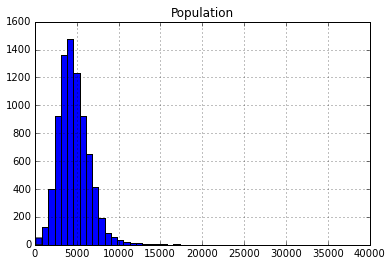

In [46]:
plt.figure()
df.hist(column='Population', bins=50)

In [47]:
import pandas as pd
df = pd.read_csv('Data/items.csv')
print df[:5]

             neighborhood                                              title  \
0    (SOMA / south beach)                   1bed + Den, 1bath at Mission Bay   
1    (SOMA / south beach)                               Love where you live!   
2   (inner sunset / UCSF)         We Welcome Your Furry Friends! Call Today!   
3    (financial district)  Golden Gateway Commons | 2BR + office townhous...   
4        (lower nob hill)         Experience Luxury Living in San Fransisco!   

   price                  bedrooms         pid   longitude         date  \
0  $2895      / 1br - 950ft² -      4046628359 -122.399663  Sep  4 2013   
1  $3354      / 1br - 710ft² -      4046761563         NaN  Sep  4 2013   
2  $2865      / 1br - 644ft² -      4046661504 -122.470727  Sep  4 2013   
3  $5500     / 2br - 1450ft² -      4036170429         NaN  Sep  4 2013   
4  $3892               / 2br -      4046732678         NaN  Sep  4 2013   

                       link   latitude                      sqft  \


In [48]:
df.shape

(1000, 11)

In [49]:
df.columns

Index([u'neighborhood', u'title', u'price', u'bedrooms', u'pid', u'longitude', u'date', u'link', u'latitude', u'sqft', u'sourcepage'], dtype='object')

In [50]:
df.dtypes

neighborhood     object
title            object
price            object
bedrooms         object
pid               int64
longitude       float64
date             object
link             object
latitude        float64
sqft             object
sourcepage       object
dtype: object

In [51]:
df['title'][0:5]

0                     1bed + Den, 1bath at Mission Bay
1                                 Love where you live!
2           We Welcome Your Furry Friends! Call Today!
3    Golden Gateway Commons | 2BR + office townhous...
4           Experience Luxury Living in San Fransisco!
Name: title, dtype: object

In [52]:
df

,neighborhood,title,price,bedrooms,pid,longitude,date,link,latitude,sqft,sourcepage
0,(SOMA / south beach),"1bed + Den, 1bath at Mission Bay",$2895,/ 1br - 950ft² -,4046628359,-122.399663,Sep 4 2013,/sfc/apa/4046628359.html,37.774623,/ 1br - 950ft² -,http://sfbay.craigslist.org/sfc/apa/
1,(SOMA / south beach),Love where you live!,$3354,/ 1br - 710ft² -,4046761563,NaN,Sep 4 2013,/sfc/apa/4046761563.html,NaN,/ 1br - 710ft² -,http://sfbay.craigslist.org/sfc/apa/
2,(inner sunset / UCSF),We Welcome Your Furry Friends! Call Today!,$2865,/ 1br - 644ft² -,4046661504,-122.470727,Sep 4 2013,/sfc/apa/4046661504.html,37.765739,/ 1br - 644ft² -,http://sfbay.craigslist.org/sfc/apa/
3,(financial district),Golden Gateway Commons | 2BR + office townhous...,$5500,/ 2br - 1450ft² -,4036170429,NaN,Sep 4 2013,/sfc/apa/4036170429.html,NaN,/ 2br - 1450ft² -,http://sfbay.craigslist.org/sfc/apa/
4,(lower nob hill),Experience Luxury Living in San Fransisco!,$3892,/ 2br -,4046732678,NaN,Sep 4 2013,/sfc/apa/4046732678.html,NaN,/ 2br -,http://sfbay.craigslist.org/sfc/apa/
5,(sunset / parkside),"$1250 - 1 bdrm, 1 bath",$1250,/ 1br -,4046731229,NaN,Sep 4 2013,/sfc/apa/4046731229.html,NaN,/ 1br -,http://sfbay.craigslist.org/sfc/apa/
6,(SOMA / south beach),Made For The Die-hard Giants Fan,$3249,/ 549ft² -,4046730047,-122.389798,Sep 4 2013,/sfc/apa/4046730047.html,37.774192,/ 549ft² -,http://sfbay.craigslist.org/sfc/apa/
7,(russian hill),Open Concept 1bed 1bath,$2690,/ 1br - 781ft² -,4046570245,-122.420787,Sep 4 2013,/sfc/apa/4046570245.html,37.796034,/ 1br - 781ft² -,http://sfbay.craigslist.org/sfc/apa/
8,NaN,"Contemporary, charming 2bds/1ba with private d...",$2850,/ 2br -,4006732632,-122.457100,Sep 4 2013,/sfc/apa/4006732632.html,37.735400,/ 2br -,http://sfbay.craigslist.org/sfc/apa/
9,(pacific heights),"2bd/2.5ba, 2 car tandem parking @ 1998 Broadwa...",$6500,/ 2br - 1400ft² -,4046018830,-122.429850,Sep 4 2013,/sfc/apa/4046018830.html,37.794973,/ 2br - 1400ft² -,http://sfbay.craigslist.org/sfc/apa/index200.html


In [53]:
print df.describe()

                pid   longitude    latitude
count  1.000000e+03  779.000000  779.000000
mean   4.035561e+09 -122.428012   37.773634
std    1.592006e+07    0.032757    0.031936
min    3.980999e+09 -122.761230   37.500000
25%    4.031480e+09 -122.442967   37.762100
50%    4.044050e+09 -122.424687   37.781521
75%    4.044962e+09 -122.410279   37.791436
max    4.046762e+09 -122.250000   37.806444


Some pandas methods are immediately useful to examine the DataFrame.  But we can also see that only the two fields assigned a numeric datatype are used in methods like describe.  So some of our cleaning work and data translation we did last session needs to be reused here before converting the data to a DataFrame, since DataFrame does not provide much functionality to do string manipulations as we needed.

The rest of today's session will be used to begin interactively adapting the previous code to use the pandas DataFrame to clean up the data and make it usable.

1. Clean neigbhorhood
2. Generate price as numeric field
3. Generate beds as numeric field
4. Generate size (sqft) as numeric field

It should be clear that what happened here was that we used a vectorized string function to operate on all rows at one time, stripping off the leading blanks and parentheses, and the trailing parentheses.

How to now strip off the $ from price, and convert it to integer, remembering that we have one or more missing values...?

First let's clean off the parentheses from around the neighborhood field.

In [54]:
df['hood'] = df['neighborhood'].str.replace('[()/]','')

print df['hood'][:10]

0      SOMA  south beach
1      SOMA  south beach
2     inner sunset  UCSF
3     financial district
4         lower nob hill
5       sunset  parkside
6      SOMA  south beach
7           russian hill
8                    NaN
9        pacific heights
Name: hood, dtype: object


In [55]:
df['rent'] = df['price'].str.replace('$','').astype('float64')
print df['rent'][:10]

0    2895
1    3354
2    2865
3    5500
4    3892
5    1250
6    3249
7    2690
8    2850
9    6500
Name: rent, dtype: float64


In [56]:
df['month'] = df['date'].str.split().str[0]
df['day'] = df['date'].str.split().str[1].astype('int32')
df['year'] = df['date'].str.split().str[2].astype('int32')

In [ ]:
# 1 print the first 5 rows of a data set

# 2 first you need to open the data set, get the first 5 rows, print them off

# 3
import stuff
load(csv)
head = read first 5 rows
print head

In [ ]:
import pandas as pd
df = pd.read_csv('x')
print df.head()

In [57]:
df.describe()

,pid,longitude,latitude,rent,day,year
count,1.000000e+03,779.000000,779.000000,997.000000,1000.000000,1000
mean,4.035561e+09,-122.428012,37.773634,4196.676028,3.380000,2013
std,1.592006e+07,0.032757,0.031936,2830.259243,0.485629,0
min,3.980999e+09,-122.761230,37.500000,195.000000,3.000000,2013
25%,4.031480e+09,-122.442967,37.762100,2600.000000,3.000000,2013
50%,4.044050e+09,-122.424687,37.781521,3375.000000,3.000000,2013
75%,4.044962e+09,-122.410279,37.791436,4950.000000,4.000000,2013
max,4.046762e+09,-122.250000,37.806444,45000.000000,4.000000,2013


In [58]:
df.groupby('neighborhood')['rent'].mean()

neighborhood
 (512 Van Ness Avenue, Steps to Hayes Valley)     2200.000000
 (512 Van Ness steps to Hayes Valley)             2700.000000
 (Alta Loma & Eastmoor Ave.)                      3000.000000
 (Candlestick Point)                              2595.000000
 (Candlestick)                                    3702.333333
 (Chinatown)                                      1800.000000
 (Daly City)                                      3200.000000
 (Glen Park/West Portal)                          3400.000000
 (Marina/Cow Hollow)                              5900.000000
 (Mission District)                               3100.000000
 (Near Harding Park & Lake Merced)                3600.000000
 (Outer Richmond)                                 2750.000000
 (Russian Hill)                                  22000.000000
 (SOMA / south beach)                             4371.741379
 (San Francisco, CA 94123)                        8000.000000
 (Sausalito)                                      4500.00